In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

/Users/wen.d/opt/anaconda3/envs/project_726/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/wen.d/opt/anaconda3/envs/project_726/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/wen.d/opt/anaconda3/envs/project_726/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/wen.d/opt/an

In [2]:
import os
p = os.path.abspath(os.getcwd())
p1, _ = os.path.split(p)
datapath, _ = os.path.split(p1)
print(p)
print(p1)
print(datapath)

/Users/wen.d/Desktop/OCR
/Users/wen.d/Desktop
/Users/wen.d


In [3]:
#windows
"""train_image = pd.read_csv(p + '\data\\train.csv')
test_image = pd.read_csv(p + '\data\\test.csv')"""
#mac or linux
train_image = pd.read_csv(p + '/data/train.csv')
test_image = pd.read_csv(p + '/data/test.csv')

train_labels = np.array(train_image['label'].values)
train_images = np.array(train_image.drop('label',axis=1).values)

test_labels = np.array(test_image['label'].values)
test_images = np.array(test_image.drop('label',axis=1).values)

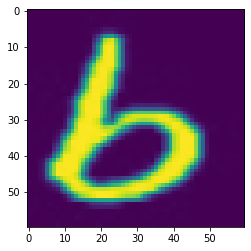

In [4]:
t = plt.imshow(train_images[10].reshape(60,60))

In [5]:
train_images = train_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 60, 60, 1)

In [6]:
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], 60, 60, 1)

In [7]:
from sklearn.preprocessing import LabelBinarizer

In [8]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [10]:
# Build and train neural network
model = Sequential([
    Conv2D(64, (8,8), padding='same', activation='relu', input_shape=(60,60,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile neural network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

# Train the neural network
model.fit(train_images, train_labels, epochs=10, validation_data = (test_images,test_labels))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 6000 samples, validate on 1200 samples
Epoch 1/10
6000/6000 [==============================] - 23s 4ms/sample - loss: 0.0562 - acc: 0.9912 - val_loss: 0.0053 - val_acc: 0.9992
Epoch 2/10
6000/6000 [==============================] - 23s 4ms/sample - loss: 0.0036 - acc: 0.9995 - val_loss: 0.0053 - val_acc: 0.9992
Epoch 3/10
6000/6000 [==============================] - 23s 4ms/sample - loss: 0.0034 - acc: 0.9995 - val_loss: 0.0047 - val_acc: 0.9992
Epoch 4/10
6000/6000 [==============================] - 24s 4ms/sample - loss: 0.0049 - acc: 0.9995 - val_loss: 0.0052 - val_acc: 0.9992
Epoch 5/10
6000/6000 [==============================] - 24s 4ms/sample - loss: 0.0034 - acc: 0.9995 - val_loss: 0.0041 - val_acc: 0.9992
Epoch 6/10
6000/6000 [==============================] - 24s 4ms/sample - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0021 - val_acc: 0.9992
Epoch 7/10
6

In [11]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(60,60,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(2, activation='softmax'))

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 128)        

In [13]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [14]:
history = model2.fit(train_images,train_labels, epochs=10, validation_data = (test_images, test_labels),  verbose=1)

Train on 6000 samples, validate on 1200 samples
Epoch 1/10
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.0487 - acc: 0.9893 - val_loss: 0.0062 - val_acc: 0.9992
Epoch 2/10
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.0055 - acc: 0.9995 - val_loss: 0.0062 - val_acc: 0.9992
Epoch 3/10
6000/6000 [==============================] - 15s 2ms/sample - loss: 0.0050 - acc: 0.9995 - val_loss: 0.0075 - val_acc: 0.9992
Epoch 4/10
6000/6000 [==============================] - 15s 3ms/sample - loss: 0.0053 - acc: 0.9995 - val_loss: 0.0064 - val_acc: 0.9992
Epoch 5/10
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.0044 - acc: 0.9995 - val_loss: 0.0072 - val_acc: 0.9992
Epoch 6/10
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.0047 - acc: 0.9995 - val_loss: 0.0066 - val_acc: 0.9992
Epoch 7/10
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.0051 - acc: 0.9995 - val_loss: 0.0079 - val_acc: 

In [15]:
test_loss2, test_accuracy2 = model2.evaluate(test_images, test_labels)

print('Model 2: Test loss: {}, Test accuracy: {}'.format(test_loss2, (test_accuracy2)*100))

1200/1200 [==============================] - 1s 852us/sample - loss: 0.0161 - acc: 0.9992
Model 2: Test loss: 0.016065438588460285, Test accuracy: 99.91666674613953


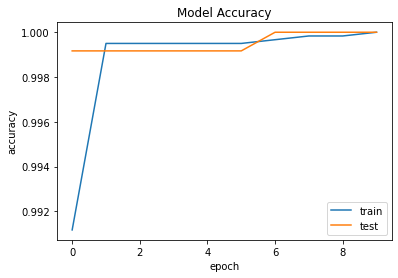

In [18]:
#model 2 test result
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [46]:
import matplotlib.pyplot as plt
import cv2

labels = ['A','B']

def predict(path):
    img = plt.imread(path)
    if len(img.shape) > 2 :
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img,(60,60))
    img1 = img1.reshape(-1,60,60,1)

    pre = model.predict_classes(img1)
    plt.imshow(img)
    plt.title('Prediction: '+labels[int(pre)])

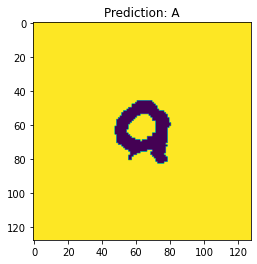

In [52]:
predict('data/hsf_1/hsf_1_02621.png')

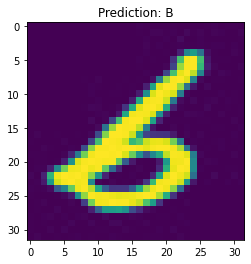

In [54]:
predict('data/test_b/_1_3223.jpg')